In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('khishavere/Geo2.csv')
data = data[data['country'] == 'IR']
data

user_id              IP country           region     city
3           6   2.176.154.139      IR   Tehran, Alborz   Tehran
4           7   2.176.154.139      IR   Tehran, Alborz   Tehran
5           8   2.176.154.139      IR   Tehran, Alborz   Tehran
6           9   2.176.154.139      IR   Tehran, Alborz   Tehran
7          10  172.80.207.239      IR   Tehran, Alborz   Tehran
...       ...             ...     ...              ...      ...
7562     7701    5.121.41.215      IR          Ardebil  Ardabil
7563     7702    5.115.77.197      IR          Markazi    Abyek
7564     7703    5.125.201.78      IR  Razavi Khorasan  Mashhad
7565     7704  188.210.167.73      IR   Tehran, Alborz   Tehran
7566     7705     86.57.88.89      IR   Tehran, Alborz   Tehran

[6695 rows x 5 columns]

In [56]:
cities = list(dict.fromkeys(data['city']))
region = list(dict.fromkeys(data['region']))

# c, r = {}, {}
c, r =[], []
for i in cities:
    c.append(sum(data['city'] == i))
#     c[i] = sum(data['city'] == i)
for i in region:
    r.append(sum(data['region'] == i))
#     r[i] = sum(data['region'] == i)

# Read map data

In [57]:
import shapefile as shp
sf = shp.Reader("geo1_ir2006_2011/geo1_ir2006_2011.shp")
def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df
df = read_shapefile(sf)
df

CNTRY_NAME                  ADMIN_NAME CNTRY_CODE GEOLEVEL1 PARENT  \
0        Iran                     Markazi        364    364000    364   
1        Iran                       Gilan        364    364001    364   
2        Iran                  Mazandaran        364    364002    364   
3        Iran            East Azarbayejan        364    364003    364   
4        Iran            West Azarbayejan        364    364004    364   
5        Iran                  Kermanshah        364    364005    364   
6        Iran                   Khuzestan        364    364006    364   
7        Iran                        Fars        364    364007    364   
8        Iran                      Kerman        364    364008    364   
9        Iran             Razavi Khorasan        364    364009    364   
10       Iran                     Esfahan        364    364010    364   
11       Iran      Sistan and Baluchestan        364    364011    364   
12       Iran                   Kordestan        364    364012    364   
13       Iran                     Hamedan        364    364013    364   
14       Iran  Chaharmahal and Bakhtiyari        364    364014    364   
15       Iran                    Lorestan        364    364015    364   
16       Iran                        Ilam        364    364016    364   
17       Iran   Kohgiluyeh and Boyerahmad        364    364017    364   
18       Iran                     Bushehr        364    364018    364   
19       Iran                      Zanjan        364    364019    364   
20       Iran                      Semnan        364    364020    364   
21       Iran                        Yazd        364    364021    364   
22       Iran                   Hormozgan        364    364022    364   
23       Iran              Tehran, Alborz        364    364023    364   
24       Iran                     Ardebil        364    364024    364   
25       Iran                         Qom        364    364025    364   
26       Iran                      Qazvin        364    364026    364   
27       Iran                    Golestan        364    364027    364   
28       Iran              North Khorasan        364    364028    364   
29       Iran              South Khorasan        364    364029    364   
30       Iran                  Lake Urmia        364    888888    364   

                                               coords  
0   [(50.84900925400004, 35.173028554000055), (50....  
1   [(50.59573060910931, 36.969781824153195), (50....  
2   [(53.86210420965429, 36.78785998477957), (53.8...  
3   [(47.35971986754588, 39.426759920710914), (47....  
4   [(45.45215771782984, 38.99310818363741), (45.4...  
5   [(47.92235344500006, 34.93453514600004), (47.9...  
6   [(49.51299408700007, 32.72414095000002), (49.5...  
7   [(52.80105663500005, 31.49487434000006), (52.8...  
8   [(57.994344953000066, 31.69404577500005), (57....  
9   [(60.50839479081735, 33.99723712172513), (60.5...  
10  [(51.83416780800012, 34.505955903000114), (51....  
11  [(59.21429775264515, 25.51797140843403), (59.2...  
12  [(47.37135137100005, 36.43804753700001), (47.3...  
13  [(49.432283890000114, 35.419413146000096), (49...  
14  [(49.73174974400007, 32.80824246600009), (49.7...  
15  [(47.886659281000085, 34.255209186000016), (47...  
16  [(47.479975547, 33.94214604299998), (47.480252...  
17  [(51.32987741800005, 31.19598620600003), (51.3...  
18  [(50.51486986600008, 30.161661771000073), (50....  
19  [(48.92225492600006, 37.17667370999999), (48.9...  
20  [(56.53206521900011, 36.66750340800011), (56.5...  
21  [(57.55669013400018, 34.597999987000186), (57....  
22  [(58.84381418000017, 26.483106547000205), (58....  
23  [(50.495942828000054, 36.34221420900013), (50....  
24  [(48.58459748001322, 38.454988266344095), (48....  
25  [(51.96490464600003, 34.86523874400007), (51.9...  
26  [(49.338108182000056, 36.74444580500006), (49....  
27  [(56.28869394786171, 38.08403810685885), (56.2...  
28  [(58.311635651624336, 37.6631327517578

In [66]:
region_id = []
for i in region:
        region_id.append(np.where(df['ADMIN_NAME']==i)[0][0])   

In [83]:
from matplotlib import cm
colors = np.array(r)
norm = plt.Normalize(colors.min(), colors.max())
cmap = cm.plasma


majid = cm.ScalarMappable(norm=norm, cmap=cmap)

def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    img = plt.imshow([colors], interpolation='nearest', origin='lower', cmap=cmap)
    img.set_visible(False)

    #cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(orientation="vertical",fraction=0.031, pad=0.04)
    plt.ylim(25,40)
    plt.xlim(42,65)
    #plt.colorbar(cax=cax)
#     id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, color = 'red')
        plt.fill(x, y, color = majid.to_rgba(0))
        
    for id, color in zip(region_id, colors):
        shape = sf.shapeRecords()[id]
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.fill(x, y, color = majid.to_rgba(color))
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

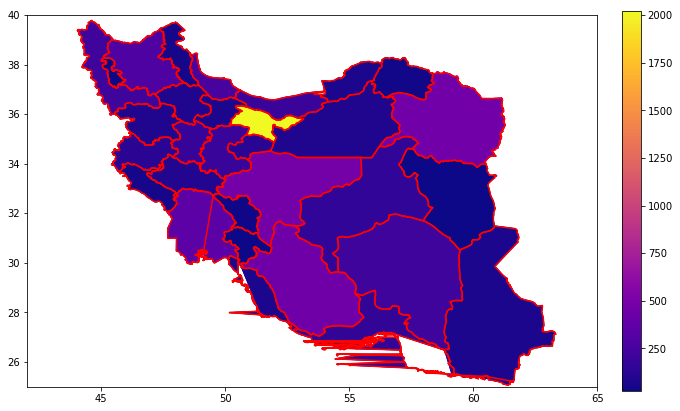

In [84]:
plot_map(sf)